In [27]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [28]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1
        print(counter)
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

def lot_short_cash_neutral(price_long, price_short, lot_long):
    return roundup((price_long*lot_long)/price_short)

def roundup(value):
    #return int(math.ceil(value / 100.0)) * 100
    ret = int(round(value, -2))
    if (ret <= 0):
        return 100
    return ret

def parameters_input_cash_neutral(pairs, data, lot=100):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        signalStr = row['SignalStr'].split('/')

        y_price = data[y_symbol][0]
        x_price = data[x_symbol][0]

        y_lot = 0
        x_lot = 0
        if (signalStr[0]=='Long'):
            x_lot = lot_short_cash_neutral(y_price, x_price, lot)
            y_lot = lot
        else:
            y_lot = lot_short_cash_neutral(x_price, y_price, lot)
            x_lot = lot

        print('{}: {} ({}) {} <-> {}: {} ({}) {}'.format(\
            signalStr[0], y_symbol, round(y_price, 2), y_lot, signalStr[1], x_symbol, round(x_price, 2), x_lot))
        
def check_coint(pairs, data):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
        print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

In [29]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [30]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-08-31
data: (333, 74)
pairs: (2300, 12)


In [31]:
#data.to_excel('datasets/data_cart.xlsx')

In [32]:
#pairs

In [33]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 2) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,B3SA3,ELET3,-4.403075,99,1.300610,2.234412,2,Long/Short,0.550327,9,"100,120,140,160,180,200,220,240,250"
1,100,BRML3,FLRY3,-4.505832,99,0.485879,2.408100,2,Long/Short,0.473119,9,"100,120,140,160,180,200,220,240,250"
2,100,EGIE3,LREN3,-4.305201,99,0.337772,2.483751,2,Long/Short,0.451023,9,"100,120,140,160,180,200,220,240,250"
3,100,ENBR3,IGTA3,-4.315669,99,0.208717,2.361036,2,Short/Long,0.451945,9,"100,120,140,160,180,200,220,240,250"
4,100,ENBR3,UGPA3,-4.400778,99,0.443977,2.433502,2,Short/Long,0.485362,9,"100,120,140,160,180,200,220,240,250"
5,100,GNDI3,UGPA3,-4.509874,99,1.603459,2.198482,2,Short/Long,0.325762,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [54]:
#plot_pairs(pairs_signal, data)
#mult.plot_residue(mult.residue(data['HAPV3'], data['IRBR3'], 100))

In [35]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [36]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [52]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,BRML3,FLRY3,-4.505832,99,0.485879,2.408100,2,Long/Short,0.473119,9,"100,120,140,160,180,200,220,240,250"
1,100,GNDI3,UGPA3,-4.509874,99,1.603459,2.198482,2,Short/Long,0.325762,9,"100,120,140,160,180,200,220,240,250"
2,100,IGTA3,LREN3,-5.868259,99,0.752046,2.347400,1,Long/Short,0.727636,9,"100,120,140,160,180,200,220,240,250"
3,100,B3SA3,ELET3,-4.613901,99,1.239296,2.254880,2,Long/Short,0.536953,9,"100,120,140,160,180,200,220,240,250"
4,100,GGBR4,VIVT4,-4.384355,99,0.063620,2.170817,2,Short/Long,0.212726,9,"100,120,140,160,180,200,220,240,250"
5,100,EGIE3,EMBR3,-5.253019,99,0.673937,2.117169,2,Long/Short,0.324547,9,"100,120,140,160,180,200,220,240,250"
6,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,Long/Short,0.641191,9,"100,120,140,160,180,200,220,240,250"


In [51]:
"""new = pairs_signal.iloc[[1,5]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"new = pairs_signal.iloc[[1,5]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [39]:
#oper.to_csv('datasets/operations.csv', index=False)

In [40]:
check_coint(oper, data)

IGTA3/LREN3, 100, True, 99
B3SA3/ELET3, 100, True, 99
GGBR4/VIVT4, 100, True, 99
EGIE3/EMBR3, 100, True, 95
ABEV3/BPAC11, 100, True, 95


0


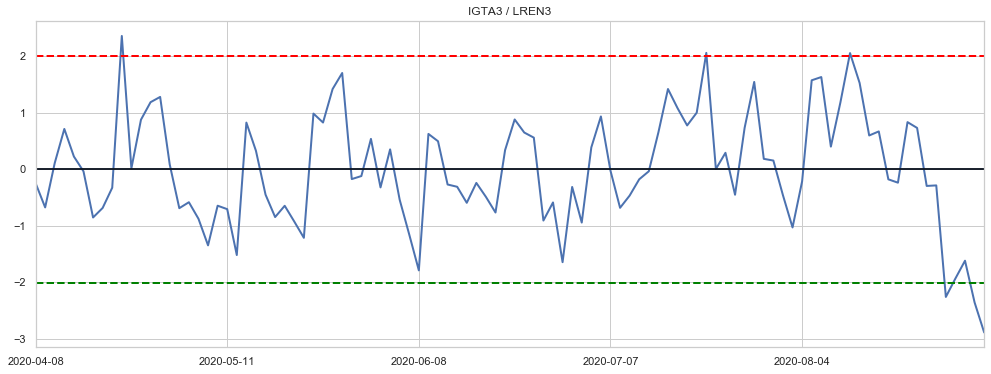

1


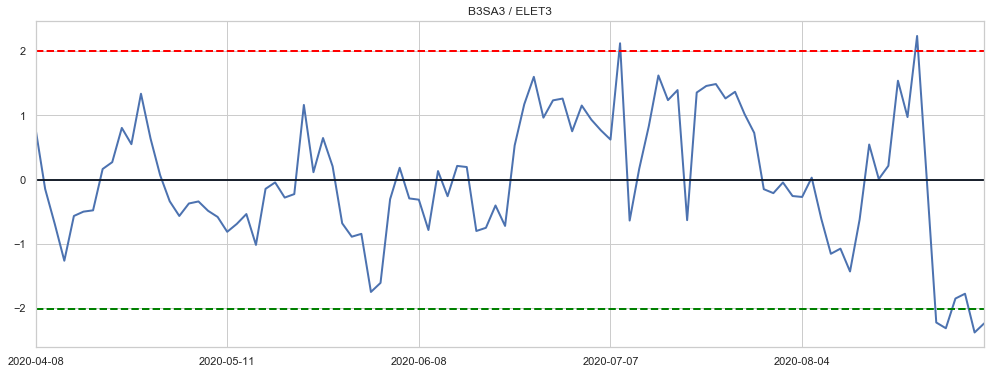

2


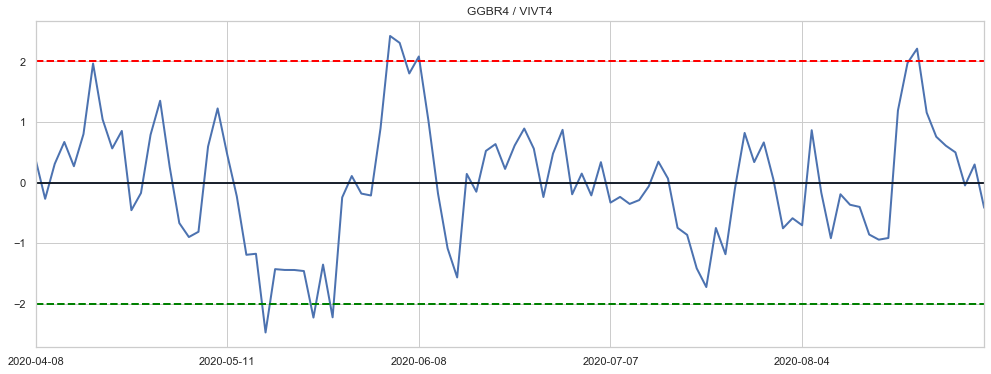

3


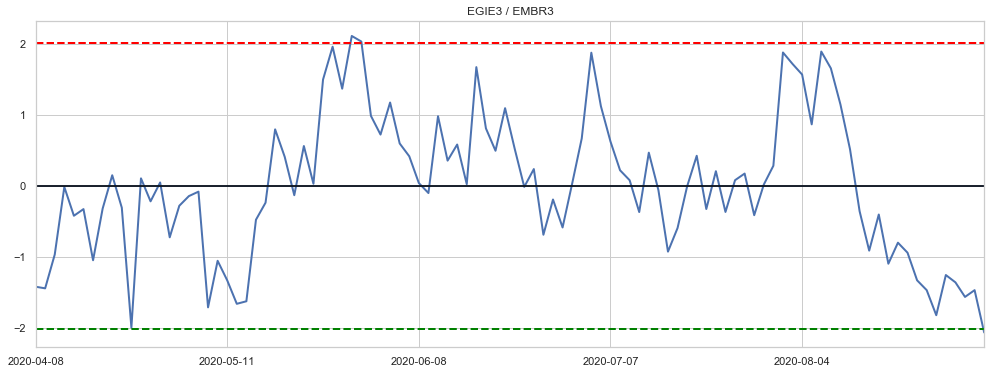

4


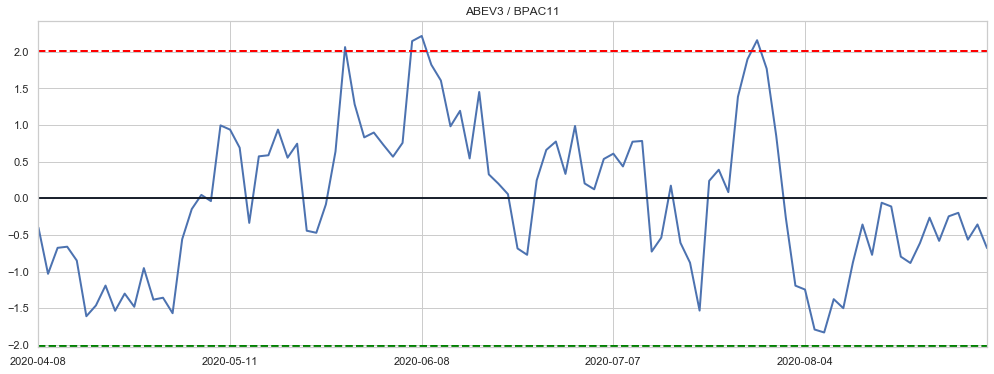

In [41]:
plot_pairs(oper, data)

In [42]:
#df.to_excel('datasets/data_cart.xlsx')

In [53]:
parameters_input_cash_neutral(oper, data)

Long: BRML3 (9.28) 100 <-> Short: FLRY3 (26.1) 100
Short: GNDI3 (74.1) 100 <-> Long: UGPA3 (19.44) 100
Long: IGTA3 (32.96) 100 <-> Short: LREN3 (43.47) 100
Long: B3SA3 (58.8) 100 <-> Short: ELET3 (35.51) 200
Short: GGBR4 (19.09) 300 <-> Long: VIVT4 (47.84) 100
Long: EGIE3 (42.63) 100 <-> Short: EMBR3 (7.34) 600
Long: ABEV3 (12.31) 100 <-> Short: BPAC11 (80.33) 100


In [55]:
"""
BRML3	FLRY3	-4.505832	99	0.485879	2.408100	2	Long/Short
GNDI3	UGPA3	-4.509874	99	1.603459	2.198482	2	Short/Long
"""

'\nBRML3\tFLRY3\t-4.505832\t99\t0.485879\t2.408100\t2\tLong/Short\n100\tGNDI3\tUGPA3\t-4.509874\t99\t1.603459\t2.198482\t2\tShort/Long\n'